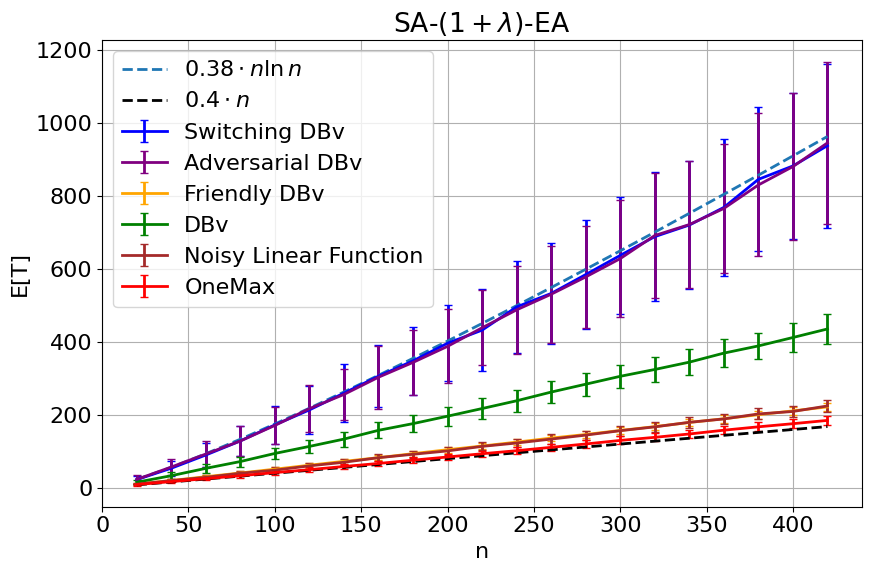

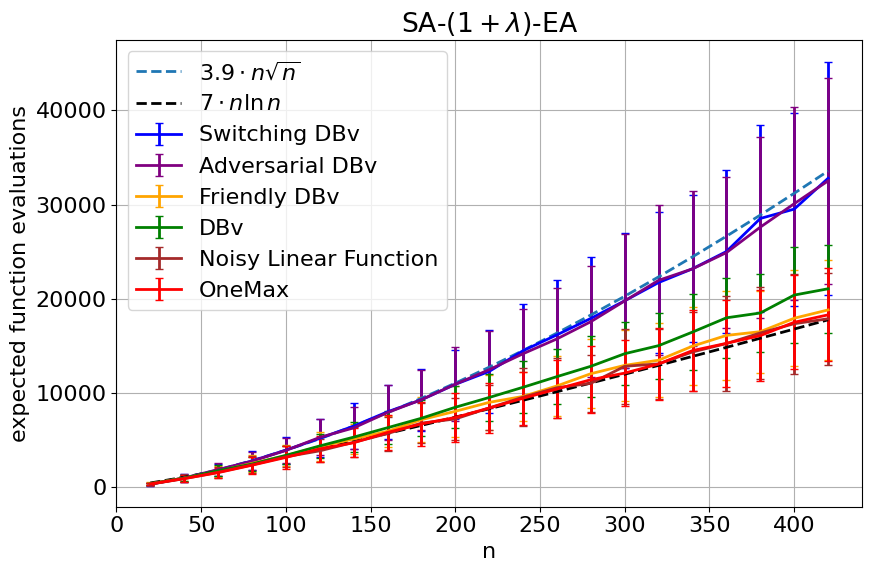

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import math

with open('SA-(1+2log(n))-EA_F=1.15_s=0.25_tries=500_nStart=20_nEnd=420_stepSize=20.txt', 'r') as file:
    lines = file.readlines()

tries = 500

n_arr = np.linspace(20, 420, 21).astype(int)

def extractData(baseInd, col):
    return np.array([[int(line.split()[col]) for line in lines[baseInd+i*(tries+1):baseInd-1+(i+1)*(tries+1)]] for i in range(len(n_arr))])

baseInd = 3
SDBVGen = extractData(baseInd, 0)
SDBVChil = extractData(baseInd, 1)
baseInd += 1+(tries+1)*len(n_arr)
ADBVGen = extractData(baseInd, 0)
ADBVChil = extractData(baseInd, 1)
baseInd += 1+(tries+1)*len(n_arr)
FDBVGen = extractData(baseInd, 0)
FDBVChil = extractData(baseInd, 1)
baseInd += 1+(tries+1)*len(n_arr)
DBVGen = extractData(baseInd, 0)
DBVChil = extractData(baseInd, 1)
baseInd += 1+(tries+1)*len(n_arr)
NLFGen = extractData(baseInd, 0)
NLFChil = extractData(baseInd, 1)
baseInd += 1+(tries+1)*len(n_arr)
OMGen = extractData(baseInd, 0)
OMChil = extractData(baseInd, 1)

plt.rcParams['font.size'] = 16
caps = 3
linew = 2
elinew = 2

# Plot 1: E[T]
plt.figure(figsize=(9, 6))

plt.errorbar(x=n_arr, y=SDBVGen.mean(axis=1), yerr=SDBVGen.std(axis=1), label='Switching DBv', color='blue', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=ADBVGen.mean(axis=1), yerr=ADBVGen.std(axis=1), label='Adversarial DBv', color='purple', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=FDBVGen.mean(axis=1), yerr=FDBVGen.std(axis=1), label='Friendly DBv', color='orange', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=DBVGen.mean(axis=1), yerr=DBVGen.std(axis=1), label='DBv', color='green', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=NLFGen.mean(axis=1), yerr=NLFGen.std(axis=1), label='Noisy Linear Function', color='brown', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=OMGen.mean(axis=1), yerr=OMGen.std(axis=1), label='OneMax', color='red', linewidth=linew, elinewidth=elinew, capsize=caps)

plt.plot(n_arr, [n*np.log(n)*0.38 for n in n_arr], label=r'$0.38\cdot n \ln{n}$', linewidth=linew, linestyle='dashed')
plt.plot(n_arr, [0.4*n for n in n_arr], label=r'$0.4\cdot n$', color='black', linewidth=linew, linestyle='dashed')

plt.title(r'SA-$(1+\lambda)$-EA')
plt.xlabel('n')
plt.ylabel(r'E[T]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('stdSimulations_SA-(1+lambda)_gen.pdf', format='pdf')
plt.show()

# Plot 2: total number of children
plt.figure(figsize=(9, 6))

plt.errorbar(x=n_arr, y=SDBVChil.mean(axis=1), yerr=SDBVChil.std(axis=1), label='Switching DBv', color='blue', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=ADBVChil.mean(axis=1), yerr=ADBVChil.std(axis=1), label='Adversarial DBv', color='purple', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=FDBVChil.mean(axis=1), yerr=FDBVChil.std(axis=1), label='Friendly DBv', color='orange', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=DBVChil.mean(axis=1), yerr=DBVChil.std(axis=1), label='DBv', color='green', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=NLFChil.mean(axis=1), yerr=NLFChil.std(axis=1), label='Noisy Linear Function', color='brown', linewidth=linew, elinewidth=elinew, capsize=caps)
plt.errorbar(x=n_arr, y=OMChil.mean(axis=1), yerr=OMChil.std(axis=1), label='OneMax', color='red', linewidth=linew, elinewidth=elinew, capsize=caps)

plt.plot(n_arr, [3.9*n**1.5 for n in n_arr], label=r'$3.9 \cdot n\sqrt{n}$', linewidth=linew, linestyle='dashed')
plt.plot(n_arr, [7*n*np.log(n) for n in n_arr], label=r'$7 \cdot n\ln{n}$', color='black', linewidth=linew, linestyle='dashed')

plt.title(r'SA-$(1+\lambda)$-EA')
plt.xlabel('n')
plt.ylabel(r'expected function evaluations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('stdSimulations_SA-(1+lambda)_funcEval.pdf', format='pdf')
plt.show()